In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load data

In [7]:
df = pd.read_csv('fp_pred.csv')
df = df.drop('Unnamed: 0', axis= 1)

In [9]:
df.head()
df['game_date'] = pd.to_datetime(df['game_date'])


In [10]:
df.columns

Index(['player_name', 'game_id', 'game_date', 'reb', 'reb_pred',
       'fanduel_salary', 'draftkings_salary', 'yahoo_salary',
       'fanduel_position', 'draftkings_position', 'yahoo_position', 'pts',
       'pts_pred', 'ast', 'ast_pred', 'stl', 'stl_pred', 'blk', 'blk_pred',
       'tov', 'tov_pred', 'fp_fanduel', 'fp_fanduel_pred', 'fp_yahoo',
       'fp_yahoo_pred', 'fp_draftkings', 'fp_draftkings_pred'],
      dtype='object')

# Summary statistics

In [11]:
df.describe()

,game_id,game_date,reb,reb_pred,fanduel_salary,draftkings_salary,yahoo_salary,pts,pts_pred,ast,...,blk,blk_pred,tov,tov_pred,fp_fanduel,fp_fanduel_pred,fp_yahoo,fp_yahoo_pred,fp_draftkings,fp_draftkings_pred
count,1.903960e+05,190396,190396.000000,190396.000000,185950.000000,185950.000000,189045.000000,190396.000000,190396.000000,190396.000000,...,190396.000000,190396.000000,190396.000000,190396.000000,190396.000000,190396.000000,190396.000000,190396.000000,190396.000000,190396.000000
mean,2.195272e+07,2020-07-31 20:58:34.914179072,4.146694,4.023065,4850.187147,4850.187147,16.984054,10.470089,10.182225,2.332328,...,0.457567,0.438354,1.261618,1.192144,21.200145,20.510179,21.200145,20.510179,21.004832,20.258531
min,2.160005e+07,2016-11-01 00:00:00,0.000000,-0.644500,3000.000000,3000.000000,10.000000,0.000000,-1.025730,0.000000,...,0.000000,-0.140023,0.000000,-0.288326,-3.500000,-2.028084,-3.500000,-2.028084,-1.500000,-0.499296
25%,2.170117e+07,2018-04-04 00:00:00,2.000000,1.891141,3200.000000,3200.000000,10.000000,4.000000,4.639216,0.000000,...,0.000000,0.012984,0.000000,0.045836,10.000000,11.214455,10.000000,11.214455,10.000000,11.126186
50%,2.200010e+07,2021-01-04 00:00:00,3.000000,3.529872,4200.000000,4200.000000,11.000000,9.000000,9.042862,2.000000,...,0.000000,0.013717,1.000000,1.010179,19.200000,18.980346,19.200000,18.980346,19.000000,18.655789
75%,2.220015e+07,2022-11-07 00:00:00,6.000000,5.453780,5900.000000,5900.000000,21.000000,15.000000,14.094372,3.000000,...,1.000000,0.983973,2.000000,1.925172,30.200000,28.021338,30.200000,28.021338,29.750000,27.450593
max,2.230123e+07,2024-04-14 00:00:00,31.000000,21.262001,14000.000000,14000.000000,66.000000,73.000000,50.003210,25.000000,...,10.000000,6.279593,12.000000,9.382727,105.200000,83.764683,105.200000,83.764683,109.750000,86.144494
std,2.331332e+05,NaN,3.467689,2.889185,1954.730103,1954.730103,10.307817,8.579682,7.284560,2.571810,...,0.823919,0.721108,1.393874,1.170831,14.502280,12.407492,14.502280,12.407492,14.456081,12.289127


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = mean_squared_error(actual, predicted, squared=False)
    r2 = r2_score(actual, predicted)
    return {'MAE': mae, 'RMSE': rmse, 'R²': r2}

In [15]:
categories = ['reb', 'pts', 'ast', 'stl', 'blk', 'tov', 'fp_fanduel', 'fp_yahoo', 'fp_draftkings']
metrics = {}

for category in categories:
    metrics[category] = calculate_metrics(df[category], df[f'{category}_pred'])


In [16]:
metrics

{'reb': {'MAE': 0.7894499723031608,
  'RMSE': 1.214945323097312,
  'R²': 0.877246067471925},
 'pts': {'MAE': 1.8860036720408573,
  'RMSE': 2.79872566325386,
  'R²': 0.8935904702569466},
 'ast': {'MAE': 0.4897091593462986,
  'RMSE': 0.852319896640786,
  'R²': 0.8901678095902986},
 'stl': {'MAE': 0.1118740165518695,
  'RMSE': 0.28525803705085007,
  'R²': 0.9105886696606839},
 'blk': {'MAE': 0.0749047400667657,
  'RMSE': 0.24470944396124275,
  'R²': 0.9117865472653474},
 'tov': {'MAE': 0.2442771335640752,
  'RMSE': 0.4788592280084535,
  'R²': 0.8819758305857037},
 'fp_fanduel': {'MAE': 2.88309059904019,
  'RMSE': 4.116501834386883,
  'R²': 0.9194275921465478},
 'fp_yahoo': {'MAE': 2.88309059904019,
  'RMSE': 4.116501834386883,
  'R²': 0.9194275921465478},
 'fp_draftkings': {'MAE': 2.9008050697849868,
  'RMSE': 4.169400243147494,
  'R²': 0.9168143670940124}}

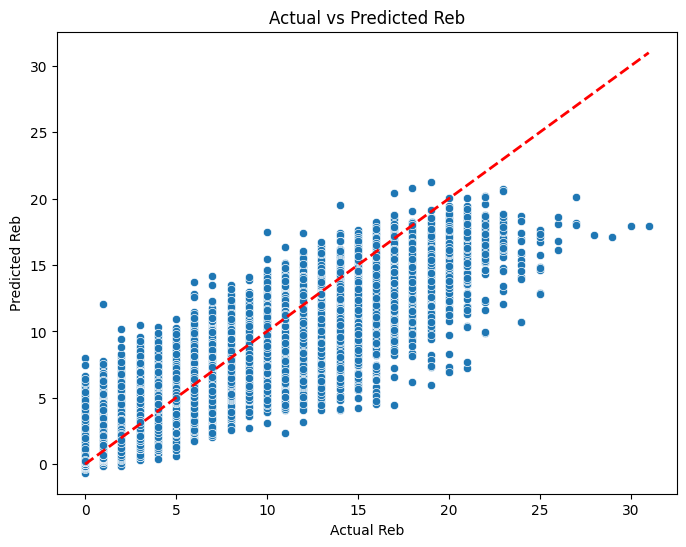

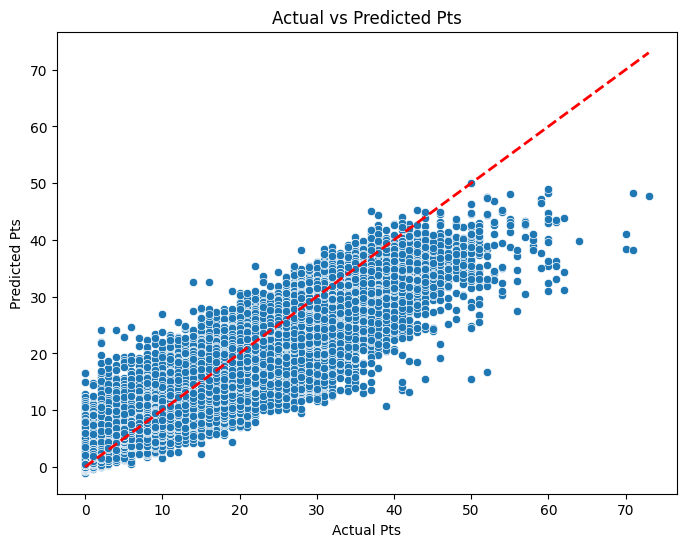

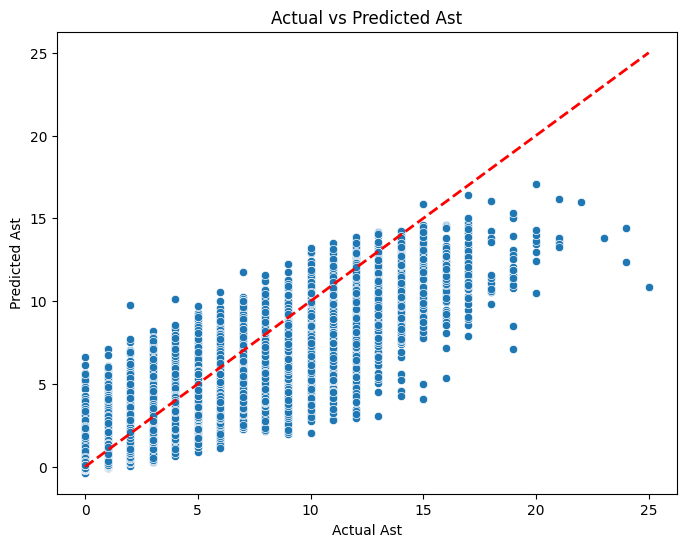

In [17]:
def plot_actual_vs_pred(df, category):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[category], y=df[f'{category}_pred'])
    plt.plot([df[category].min(), df[category].max()], [df[category].min(), df[category].max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted {category.capitalize()}')
    plt.xlabel(f'Actual {category.capitalize()}')
    plt.ylabel(f'Predicted {category.capitalize()}')
    plt.show()

# Example for plotting rebounds
plot_actual_vs_pred(df, 'reb')

# You can do this for other categories like points, assists, etc.
plot_actual_vs_pred(df, 'pts')
plot_actual_vs_pred(df, 'ast')


In [24]:
df['fanduel_salary_bucket'] = pd.cut(np.array(df['fanduel_salary']), bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Elite'])




          player_name  fanduel_salary fanduel_salary_bucket
0      Draymond Green          7700.0                Medium
1  Kristaps Porzingis          7100.0                   Low
2           Ian Clark          3000.0              Very Low
3         Buddy Hield          3500.0              Very Low
4         Tyler Ennis             NaN                   NaN


In [29]:
df[df['fanduel_salary_bucket'] == 'High']['player_name'].unique() #, 'fanduel_salary', 'fanduel_salary_bucket']]

array(['DeMarcus Cousins', 'Kevin Durant', 'Anthony Davis',
       'James Harden', 'LeBron James', 'Giannis Antetokounmpo',
       'Russell Westbrook', 'John Wall', 'Karl-Anthony Towns',
       'Chris Paul', 'Isaiah Thomas', 'Stephen Curry', 'Nikola Jokic',
       'Kawhi Leonard', 'Damian Lillard', 'Jimmy Butler', 'Paul George',
       'Joel Embiid', 'Blake Griffin', 'John Henson', 'Ben Simmons',
       'Andre Drummond', 'Shabazz Napier', 'Gary Harris', 'Dwight Howard',
       'LaMarcus Aldridge', 'Kemba Walker', 'Nikola Vucevic',
       'Bradley Beal', 'Devin Booker', 'Luka Doncic', 'Kyrie Irving',
       'Trae Young', 'Zach LaVine', 'Domantas Sabonis',
       'Hassan Whiteside', 'Jayson Tatum', 'Julius Randle',
       'Zion Williamson', "De'Aaron Fox", 'Ja Morant', 'Dejounte Murray',
       'LaMelo Ball', 'Christian Wood', 'Donovan Mitchell',
       'Darius Garland', 'Jaylen Brown', 'Rudy Gobert', 'Brandon Ingram',
       'Jonas Valanciunas', 'Jarrett Allen', 'Fred VanVleet',
       

In [32]:
for tier in ['Very Low', 'Low', 'Medium', 'High', 'Elite']:
    dff = df[df['fanduel_salary_bucket'] == tier]
    print(f'KPIs for {tier}')
    for category in categories:
        metrics[category] = calculate_metrics(dff[category], dff[f'{category}_pred'])
    print(metrics)

KPIs for Very Low
{'reb': {'MAE': 0.666009577385332, 'RMSE': 1.0404782155931176, 'R²': 0.8565787922791066}, 'pts': {'MAE': 1.4840304124591006, 'RMSE': 2.22047673173091, 'R²': 0.8582760131909386}, 'ast': {'MAE': 0.3388230511659715, 'RMSE': 0.620723535275638, 'R²': 0.8744419404172965}, 'stl': {'MAE': 0.07550500924649171, 'RMSE': 0.21823937488337333, 'R²': 0.9342129965218043}, 'blk': {'MAE': 0.04948224564286664, 'RMSE': 0.1751802155628085, 'R²': 0.9380854629218774}, 'tov': {'MAE': 0.13906136052746562, 'RMSE': 0.3003760789928081, 'R²': 0.9144845620504158}, 'fp_fanduel': {'MAE': 2.3041993310558713, 'RMSE': 3.2973003557090785, 'R²': 0.8991094392608162}, 'fp_yahoo': {'MAE': 2.3041993310558713, 'RMSE': 3.2973003557090785, 'R²': 0.8991094392608162}, 'fp_draftkings': {'MAE': 2.2980168619761416, 'RMSE': 3.3098069739620573, 'R²': 0.8910033476077382}}
KPIs for Low
{'reb': {'MAE': 0.9672275668933734, 'RMSE': 1.40278673633676, 'R²': 0.8409953943018382}, 'pts': {'MAE': 2.4762173518689052, 'RMSE': 3.36

In [10]:
stat_cols = ['reb', 'reb_pred',
       'pts', 'pts_pred', 'ast', 'ast_pred', 'stl',
       'stl_pred', 'blk', 'blk_pred', 'to', 'to_pred', 'fp_fanduel',
       'fp_fanduel_pred', 'fp_yahoo', 'fp_yahoo_pred', 'fp_draftkings',
       'fp_draftkings_pred']

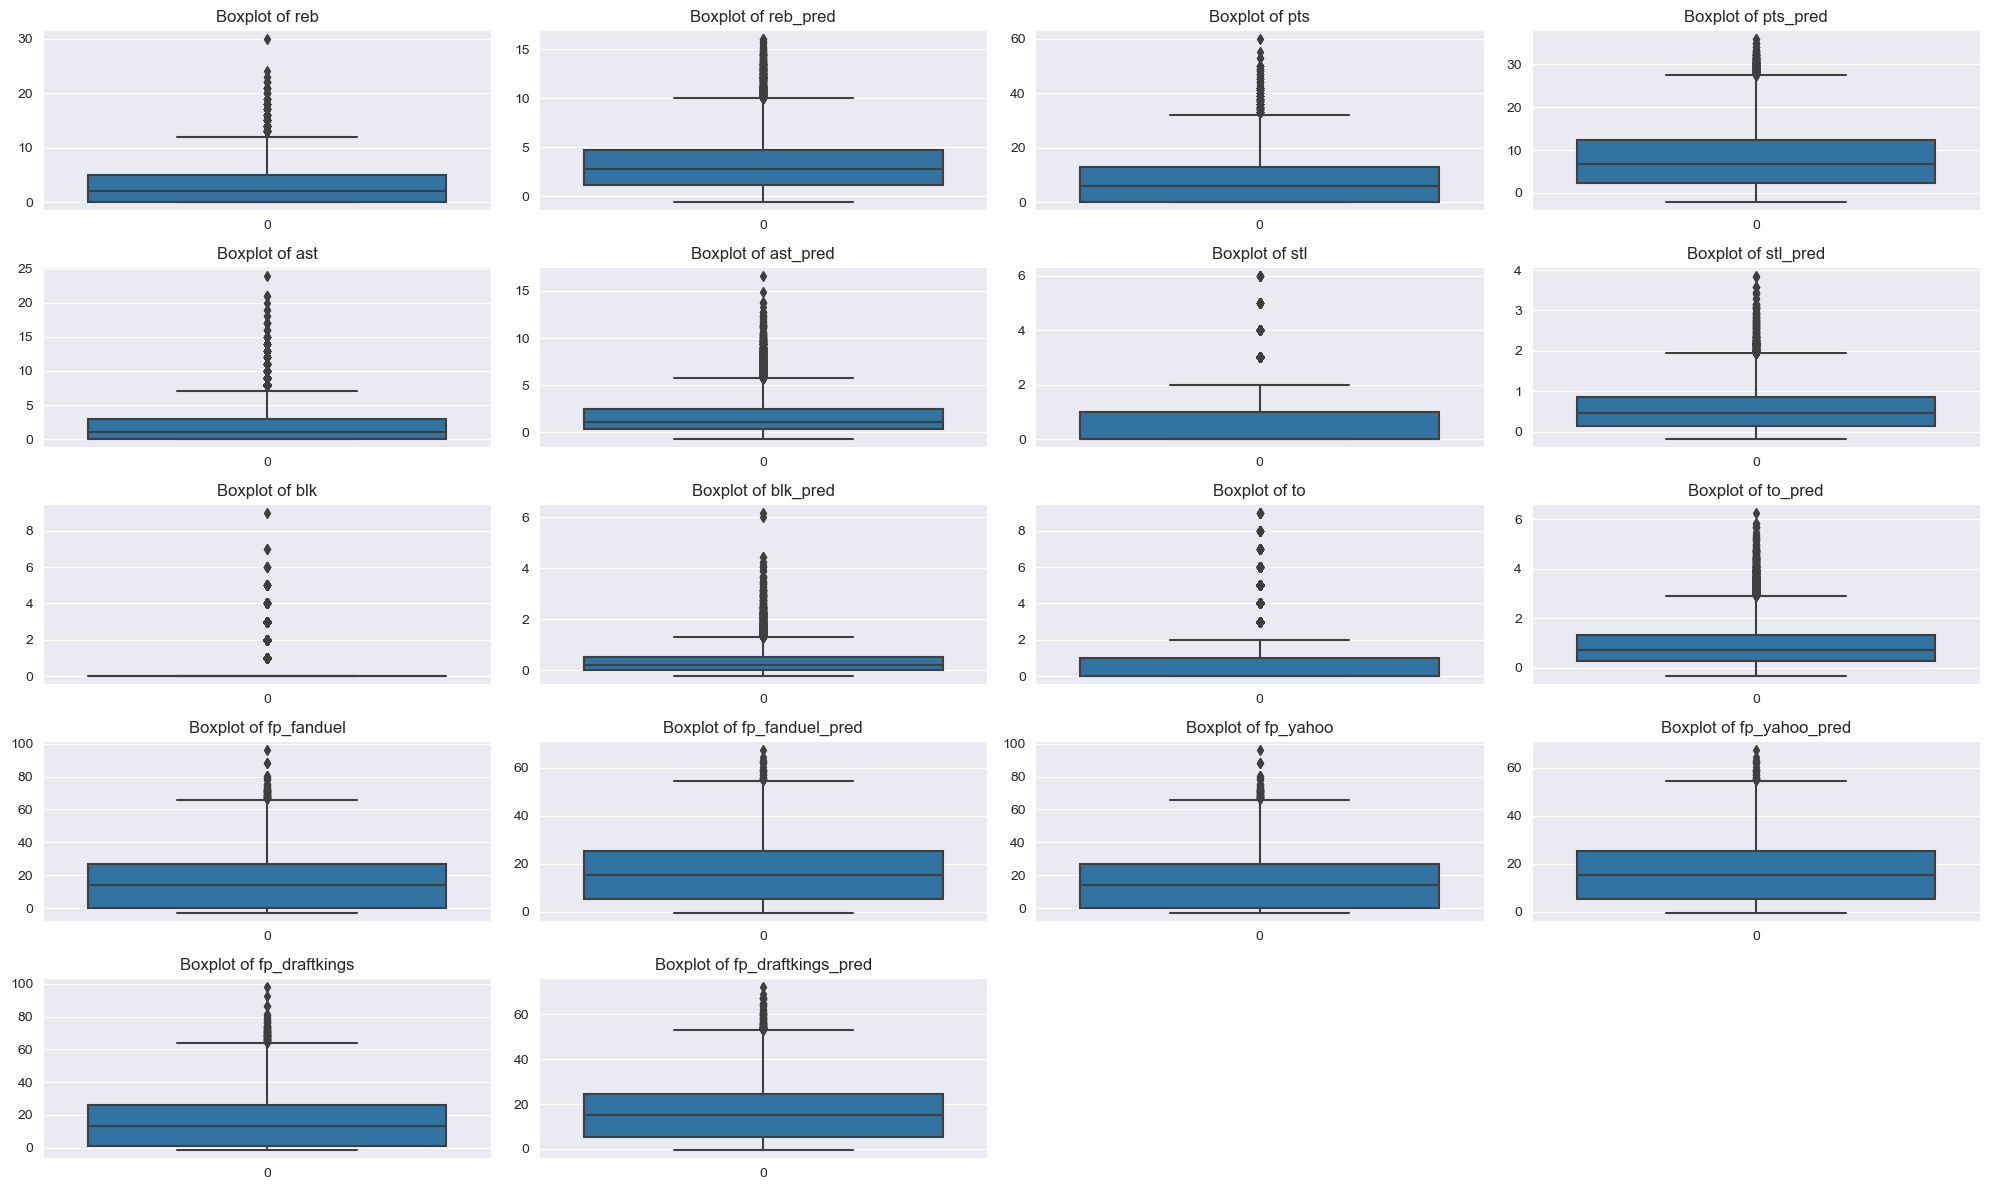

In [11]:
plt.figure(figsize=(20, 12))
for i, column in enumerate(stat_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


# Calcluate errors

In [12]:
# Calculate prediction errors
df['pts_error'] = abs(df['pts'] - df['pts_pred'])
df['reb_error'] = abs(df['reb'] - df['reb_pred'])
df['ast_error'] = abs(df['ast'] - df['ast_pred'])
df['stl_error'] = abs(df['stl'] - df['stl_pred'])
df['blk_error'] = abs(df['blk'] - df['blk_pred'])
df['to_error'] = abs(df['to'] - df['to_pred'])
df['fp_fanduel_error'] = abs(df['fp_fanduel'] - df['fp_fanduel_pred'])
df['fp_yahoo_error'] = abs(df['fp_yahoo'] - df['fp_yahoo_pred'])
df['fp_draftkings_error'] = abs(df['fp_draftkings'] - df['fp_draftkings_pred'])

# Calculate percentage errors (avoid division by zero)
df['pts_pct_error'] = abs((df['pts'] - df['pts_pred']) / df['pts'].replace(0, 1))
df['reb_pct_error'] = abs((df['reb'] - df['reb_pred']) / df['reb'].replace(0, 1))
df['ast_pct_error'] = abs((df['ast'] - df['ast_pred']) / df['ast'].replace(0, 1))
df['stl_pct_error'] = abs((df['stl'] - df['stl_pred']) / df['stl'].replace(0, 1))
df['blk_pct_error'] = abs((df['blk'] - df['blk_pred']) / df['blk'].replace(0, 1))
df['to_pct_error'] = abs((df['to'] - df['to_pred']) / df['to'].replace(0, 1))
df['fp_fanduel_pct_error'] = abs((df['fp_fanduel'] - df['fp_fanduel_pred']) / df['fp_fanduel'].replace(0, 1))
df['fp_yahoo_pct_error'] = abs((df['fp_yahoo'] - df['fp_yahoo_pred']) / df['fp_yahoo'].replace(0, 1))
df['fp_draftkings_pct_error'] = abs((df['fp_draftkings'] - df['fp_draftkings_pred']) / df['fp_draftkings'].replace(0, 1))


## Group by team

In [14]:
team_errors = df.groupby('team').mean()[[
    'pts_error', 'reb_error', 'ast_error', 'stl_error', 'blk_error', 'to_error',
    'fp_fanduel_error', 'fp_yahoo_error', 'fp_draftkings_error',
    'pts_pct_error', 'reb_pct_error', 'ast_pct_error', 'stl_pct_error', 'blk_pct_error', 'to_pct_error',
    'fp_fanduel_pct_error', 'fp_yahoo_pct_error', 'fp_draftkings_pct_error'
]]

C:\Users\User\AppData\Local\Temp\ipykernel_8552\827017784.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_errors = df.groupby('team').mean()[[


In [16]:
team_errors_sorted = team_errors.sort_values(by='fp_fanduel_error')
team_errors_sorted

,pts_error,reb_error,ast_error,stl_error,blk_error,to_error,fp_fanduel_error,fp_yahoo_error,fp_draftkings_error,pts_pct_error,reb_pct_error,ast_pct_error,stl_pct_error,blk_pct_error,to_pct_error,fp_fanduel_pct_error,fp_yahoo_pct_error,fp_draftkings_pct_error
team,,,,,,,,,,,,,,,,,,
NYK,3.179753,1.430321,0.793845,0.527019,0.378781,0.559938,5.633101,5.633101,5.321602,0.885613,0.647536,0.455444,0.430047,0.316780,0.405383,1.109841,1.109841,1.070750
UTA,3.452269,1.447175,0.967490,0.438781,0.342864,0.658116,5.694891,5.694891,5.520441,0.959400,0.641652,0.538343,0.371653,0.282598,0.480153,1.437762,1.437762,1.346735
POR,3.427873,1.517371,0.926310,0.446950,0.383303,0.613572,5.768198,5.768198,5.572791,1.067798,0.674291,0.525904,0.370459,0.337846,0.449320,1.501190,1.501190,1.378065
CHI,3.419547,1.581480,1.117403,0.517381,0.347378,0.682713,5.997727,5.997727,5.776987,1.074004,0.752422,0.611023,0.419582,0.302085,0.515652,1.689615,1.689615,1.628775
MIL,3.709488,1.592318,0.875004,0.569700,0.350343,0.638922,5.999352,5.999352,5.823855,1.158136,0.666422,0.460337,0.448637,0.287158,0.469049,1.573379,1.573379,1.521524
PHX,3.673650,1.436846,0.938606,0.485364,0.350854,0.622810,6.232662,6.232662,5.983664,0.980749,0.668189,0.521624,0.391268,0.295841,0.458944,1.371083,1.371083,1.332268
DAL,3.421201,1.608997,0.951883,0.507430,0.350799,0.552425,6.255639,6.255639,5.982913,1.081282,0.836367,0.557598,0.406976,0.312745,0.419659,1.818699,1.818699,1.655208
WAS,4.046188,1.642378,0.930350,0.501019,0.426307,0.725010,6.482293,6.482293,6.287709,1.190983,0.717840,0.496271,0.415356,0.350991,0.504605,1.444781,1.444781,1.381231
ATL,3.874785,1.678092,0.912375,0.548362,0.361904,0.668321,6.544161,6.544161,6.261242,1.145320,0.764456,0.511717,0.440703,0.307888,0.473293,1.573177,1.573177,1.528708


<Figure size 1400x800 with 0 Axes>

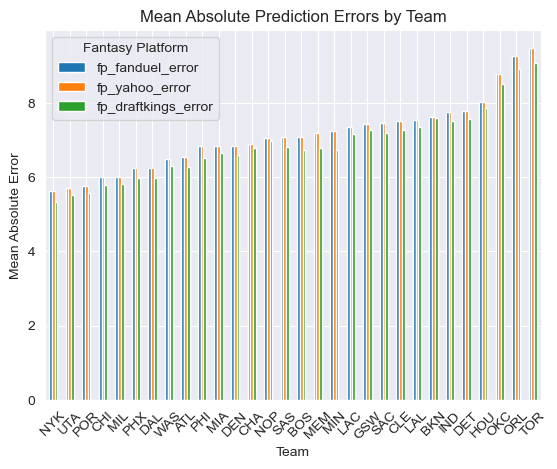

<Figure size 1400x800 with 0 Axes>

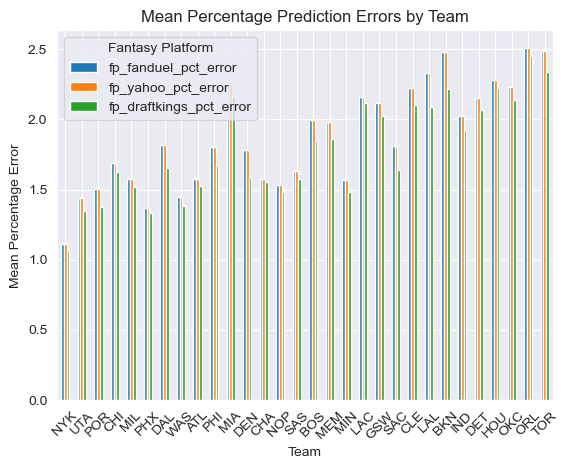

In [17]:
plt.figure(figsize=(14, 8))
team_errors_sorted[['fp_fanduel_error', 'fp_yahoo_error', 'fp_draftkings_error']].plot(kind='bar')
plt.title('Mean Absolute Prediction Errors by Team')
plt.xlabel('Team')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.legend(title='Fantasy Platform')
plt.show()

# Plot mean percentage errors by team
plt.figure(figsize=(14, 8))
team_errors_sorted[['fp_fanduel_pct_error', 'fp_yahoo_pct_error', 'fp_draftkings_pct_error']].plot(kind='bar')
plt.title('Mean Percentage Prediction Errors by Team')
plt.xlabel('Team')
plt.ylabel('Mean Percentage Error')
plt.xticks(rotation=45)
plt.legend(title='Fantasy Platform')
plt.show()

## Group by position

## Group by perforamnce

In [18]:
df['pts_cluster'] = pd.cut(df['pts'], bins=[-float('inf'), 5, 10, 20, float('inf')],
                           labels=['<5', '5-10', '10-20', '>20'])

# Repeat for other categories
df['reb_cluster'] = pd.cut(df['reb'], bins=[-float('inf'), 5, 10, 20, float('inf')],
                           labels=['<3', '3-7', '7-12', '>12'])
df['ast_cluster'] = pd.cut(df['ast'], bins=[-float('inf'), 5, 10, 20, float('inf')],
                           labels=['<3', '3-7', '7-12', '>12'])
df['stl_cluster'] = pd.cut(df['stl'], bins=[-float('inf'), 1, 2, 3, float('inf')],
                           labels=['<1', '1-2', '2-3', '>3'])
df['blk_cluster'] = pd.cut(df['blk'], bins=[-float('inf'), 1, 2, 3, float('inf')],
                           labels=['<1', '1-2', '2-3', '>3'])
df['to_cluster'] = pd.cut(df['to'], bins=[-float('inf'), 1, 2, 3, float('inf')],
                          labels=['<1', '1-2', '2-3', '>3'])
df['fp_fanduel_cluster'] = pd.cut(df['fp_fanduel'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                  labels=['<10', '10-20', '20-30', '>30'])
df['fp_yahoo_cluster'] = pd.cut(df['fp_yahoo'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                labels=['<10', '10-20', '20-30', '>30'])
df['fp_draftkings_cluster'] = pd.cut(df['fp_draftkings'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                     labels=['<10', '10-20', '20-30', '>30'])


C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

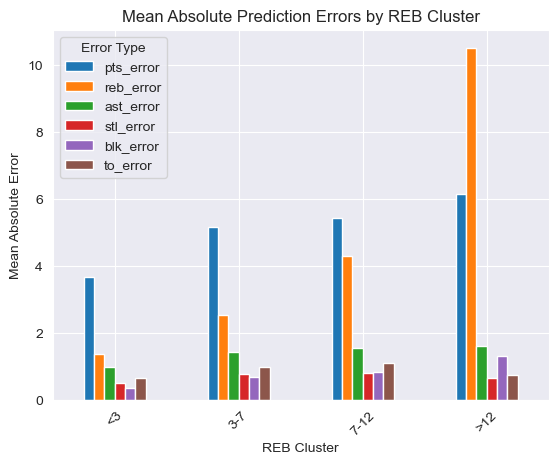

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

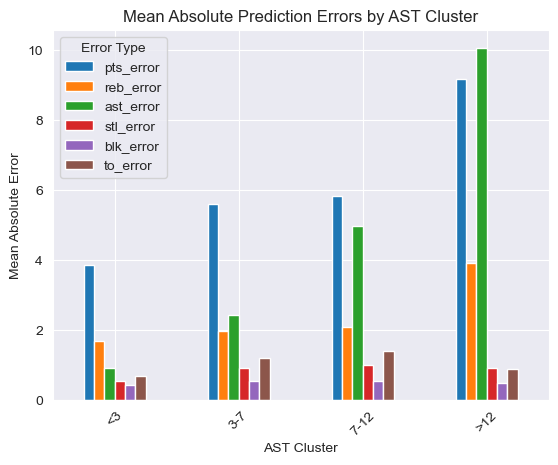

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

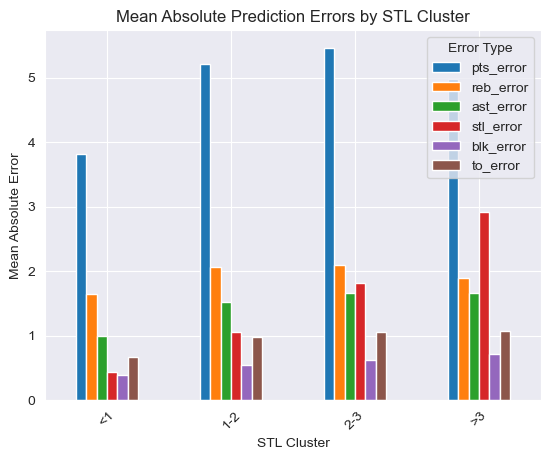

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

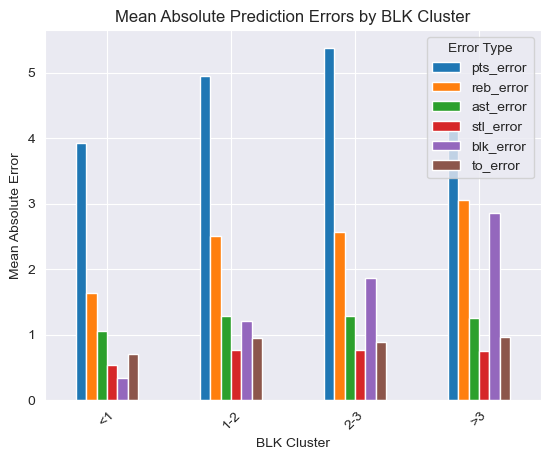

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

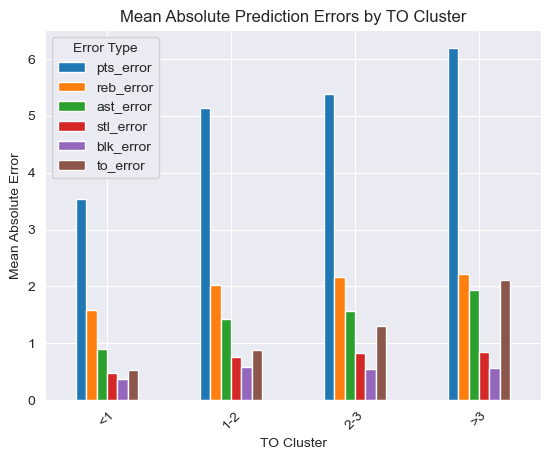

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

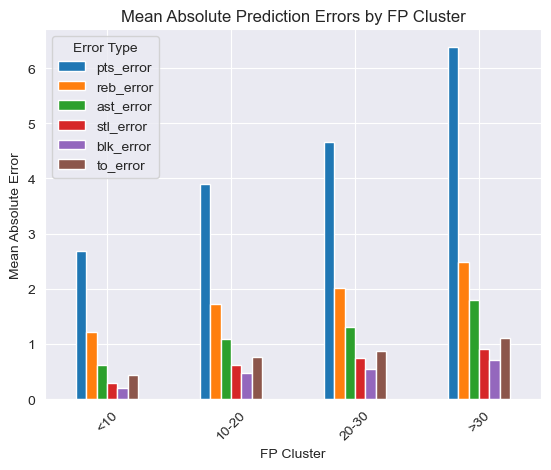

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

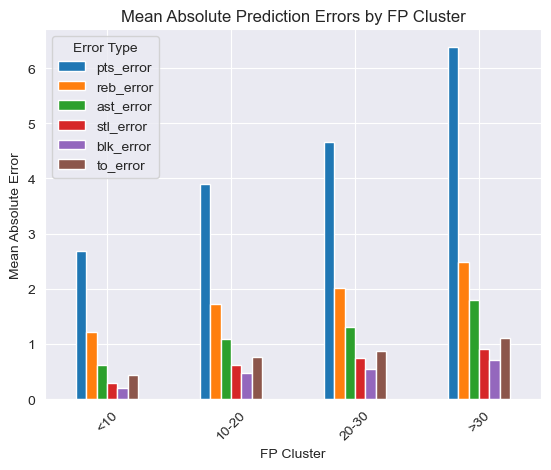

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

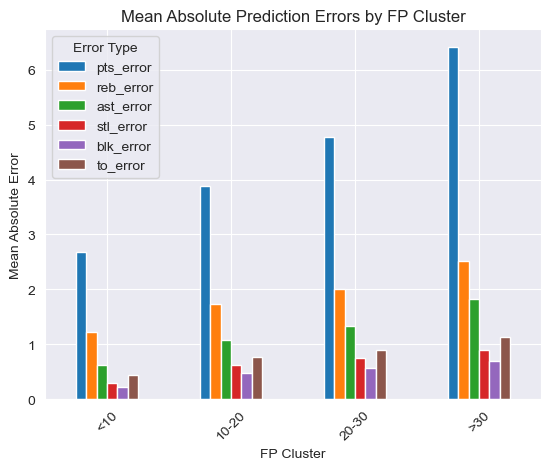

In [24]:
clusters = ['reb_cluster',
'ast_cluster',
'stl_cluster',
'blk_cluster',
'to_cluster',
'fp_fanduel_cluster',
'fp_yahoo_cluster',
'fp_draftkings_cluster',]

for cluster in clusters:
    cluster_name = cluster.split('_')[0].upper()
    cluster_errors = df.groupby(cluster).mean()[[
    'pts_error', 'reb_error', 'ast_error', 'stl_error', 'blk_error', 'to_error',
    'fp_fanduel_error', 'fp_yahoo_error', 'fp_draftkings_error',
    'pts_pct_error', 'reb_pct_error', 'ast_pct_error', 'stl_pct_error', 'blk_pct_error', 'to_pct_error',
    'fp_fanduel_pct_error', 'fp_yahoo_pct_error', 'fp_draftkings_pct_error'
]]
    
    plt.figure(figsize=(14, 8))
    cluster_errors[['pts_error', 'reb_error', 'ast_error', 'stl_error', 'blk_error', 'to_error']].plot(kind='bar')
    plt.title(f'Mean Absolute Prediction Errors by {cluster_name} Cluster')
    plt.xlabel(f'{cluster_name} Cluster')
    plt.ylabel('Mean Absolute Error')
    plt.xticks(rotation=45)
    plt.legend(title='Error Type')
    plt.show()



## Group by cluster